# **The Sparks Foundation Internship - Task 6**
### Author: Muhammad Hammad Hassan
### Batch April 2022
---------------
#### **Objective**
1. Create Decision Tree Classifier and Vizualize it.
1. Feed new data points to test out the Decision Tree
----------------


# 1- Loading Assets

**1.1- Loading Libraries**

In [63]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn import tree
from sklearn import metrics

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**1.2- Loading Dataset**

In [64]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=['SepalLength','SepalWidth','PetalLength','PetalWidth'])

In [65]:
target = pd.DataFrame(iris.target, columns=['target'])
dataset = pd.concat([df, target], axis = 1)

# 2- Exploring The Dataset

In [66]:
dataset.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [68]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
dataset['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# 3- Visualization

Creating a plotting function to plot for each column

In [70]:
def makeplots(col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col], color='salmon')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col], dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col],color='pink')
    plt.show()

 Statistical Plots for the Feature : SepalLength are shown ↓


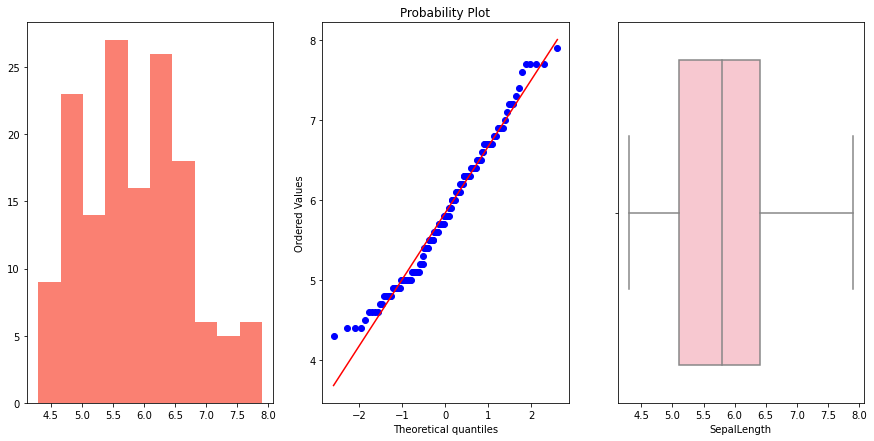

---------------------------------------------------------------------------
 Statistical Plots for the Feature : SepalWidth are shown ↓


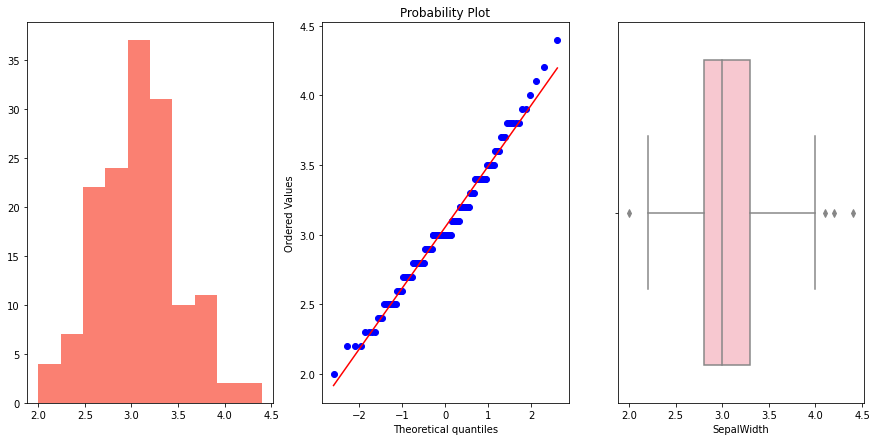

---------------------------------------------------------------------------
 Statistical Plots for the Feature : PetalLength are shown ↓


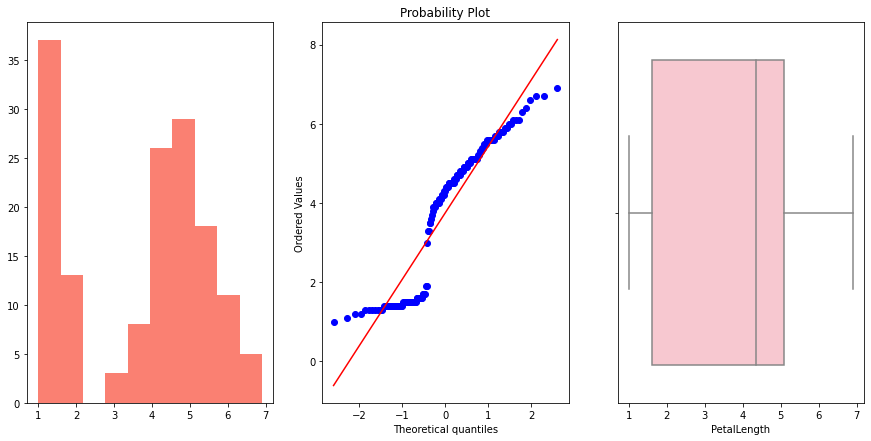

---------------------------------------------------------------------------
 Statistical Plots for the Feature : PetalWidth are shown ↓


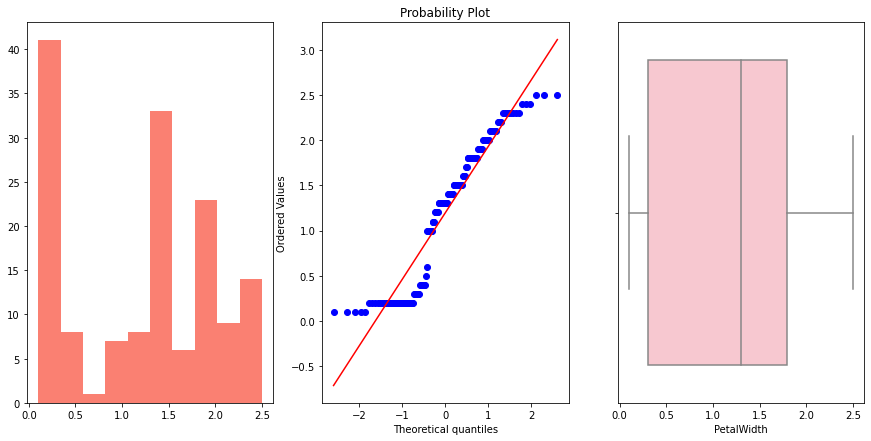

---------------------------------------------------------------------------


In [71]:
for elem in df.columns:
    print(f' Statistical Plots for the Feature : {elem} are shown ↓')
    makeplots(elem)
    print("-"*75)

The above plots show that **Petal Width** and **Petal Length** features do not follow Gaussian/Normal Distribution.

Scaling the plots will not be necessary as Decision Tree should not be taking the scale into consideration. But lets see if it is any good or not.

# 4- Applying Decision Tree

**4.1- Applying Decision Tree**

In [73]:
train = dataset[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
test = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2)
X_train.shape,X_test.shape

((120, 4), (30, 4))

Applying Decision tree for "train" and "test" sample in above cell. We will name this try as "Try 1"


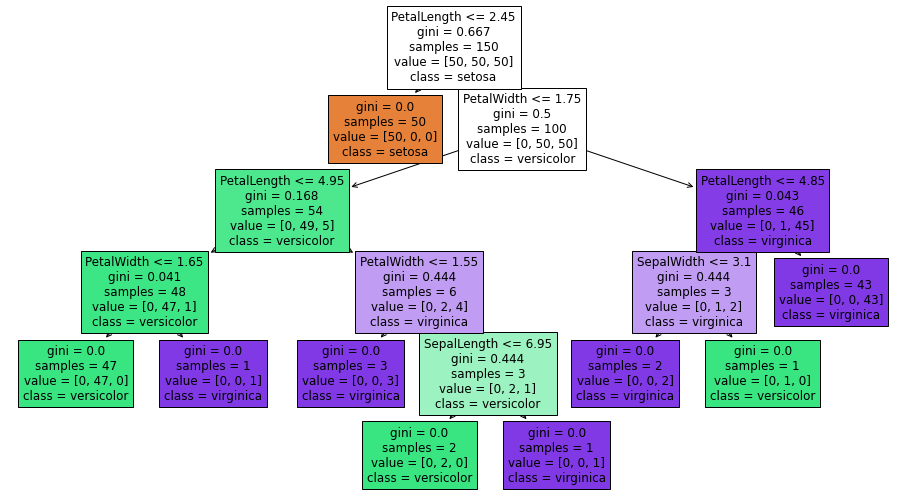

In [74]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(train,test)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()

Applying Decision tree for "X_train" and "y_train" sample in above cell. We will name this try as "Try 2"




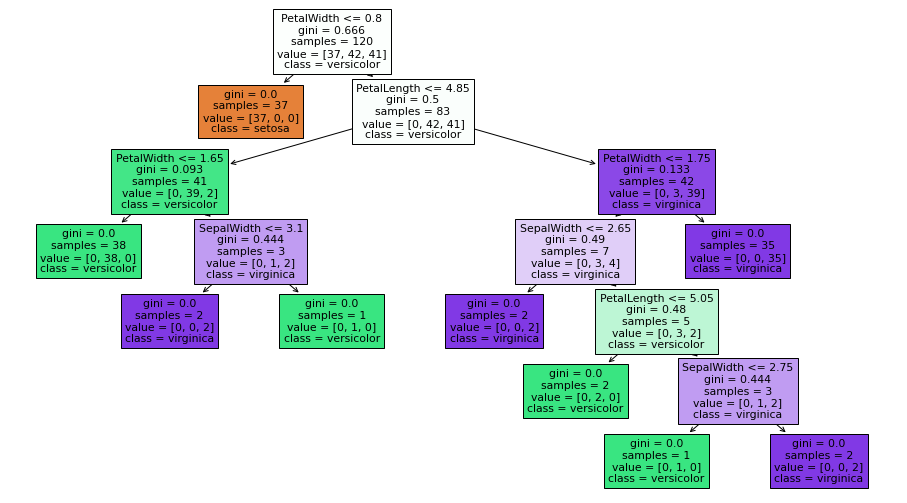

In [75]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()

**COMMENT:** 
1. We can take note from GINI Index from both **"Try 1"** and **"Try 2"** and deduce that both the trees have a starting branch with a GINI of 0, so that is good. Other significant thing to be noted is that if we compare both the Level 2 node on the right hand side (one which "PetalWidth<=1.75"), It has two extending child nodes with GINI of 0.168(left) and 0.043(right) in **"Try 1"**, and 0.1(left) and 0.049(right) in **"Try 2"**. This is where the shift in balance of both the trees start. 
1. Furthermore as we traverse down the tree, We see that **"Try 2"** has more levels than **"Try 1"**, this is a given since we used a bigger dataset in **"Try 1"**. This could cause a problem of over fitting, therefore we need to prunne our data for better results.

**4.2- Pruning the dataset**

In [76]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00952381, 0.01111111, 0.01785714, 0.02059621,
       0.26764724, 0.31991131])

In [77]:
alpha_list = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)

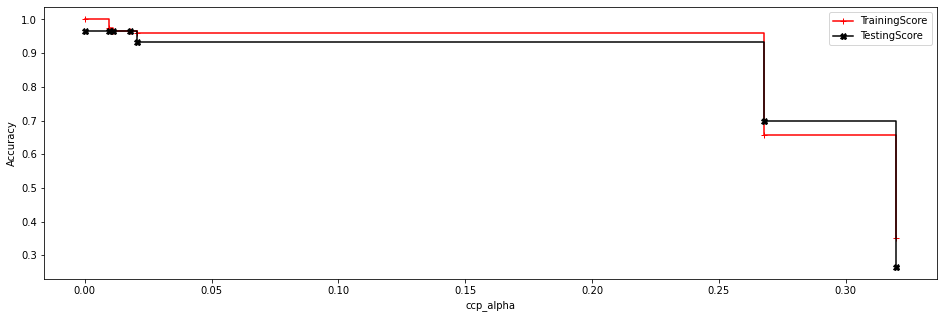

In [78]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score = [clf.score(X_test,y_test) for clf in alpha_list]

plt.figure(figsize = (16,5))

plt.plot(ccp_alphas,train_score,marker = '+',label = 'TrainingScore',
        drawstyle = "steps-post",c= 'red')
plt.plot(ccp_alphas,test_score,marker = 'X',label = 'TestingScore',
        drawstyle = "steps-post",c = 'black')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We canobserve a near-perfect score of our tree from ccp_alpha values 0.00 to 0.03. To maintain a lo bias and low variance, we will select ccp_alpha value fromthis range.

We wil need to perform hyper parameter tuning to determine the optimum value.

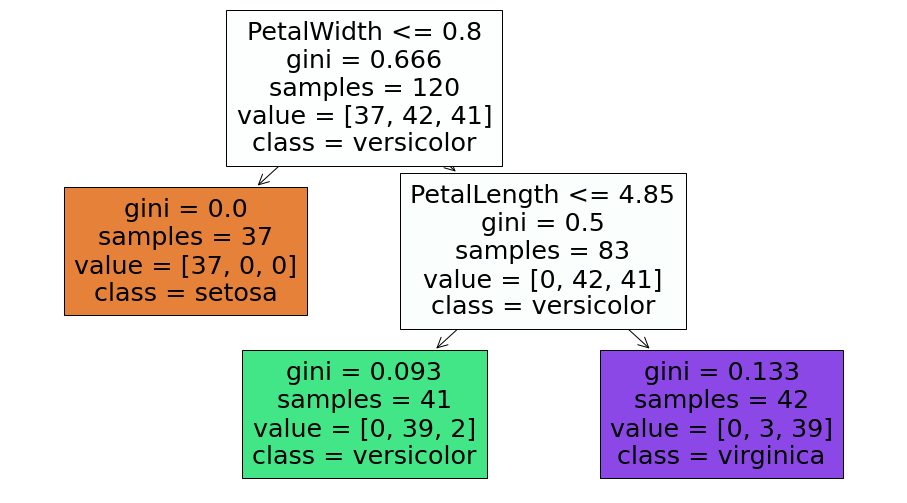

In [79]:
clf = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.025)
clf.fit(X_train,y_train)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()

We will now visualize decision boundaries to determine which parameter is ample for our needs.i.e Sepal or Petal ones.

In [105]:
sepal_data = dataset[['SepalLength', 'SepalWidth']]
petal_data = dataset[['PetalLength', 'PetalWidth']]
Species_data = dataset['target']

#separating columns
sp_length = sepal_data['SepalLength'].values
sp_width = sepal_data['SepalWidth'].values
sp_array = np.c_[sp_length,sp_width]

pt_length = petal_data['PetalLength'].values
pt_width = petal_data['PetalWidth'].values
pt_array = np.c_[pt_length,pt_width]


In [106]:
def getmeshgrid(data):
  
  x_min, x_max = data[:,0].min()-1 , data[:,0].max()+1
  y_min, y_max = data[:,1].min()-1 , data[:,1].max()+1

  return np.meshgrid( ( np.arange(x_min, x_max, 0.01) ),
                     ( np.arange(y_min, y_max, 0.01) ))

**4.3- Decision Boundaries for Sepal Data**




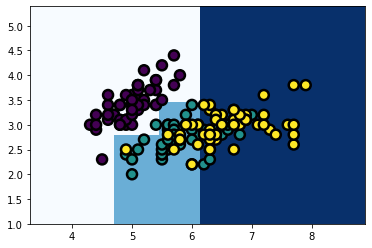

In [107]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(sepal_data, Species_data)
xx, yy = getmeshgrid(sp_array)

predicted = clf.predict( np.c_[xx.ravel(), yy.ravel()] ).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap='Blues')
plt.scatter( sp_array[:,0], sp_array[:,1], c=Species_data, s=100, cmap='viridis', edgecolors='black', linewidths=2.5 )

**4.4- Overfitting Case for Sepal data**

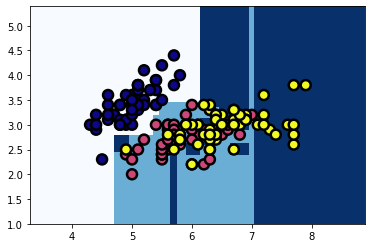

In [108]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=50)
clf.fit(sepal_data,Species_data)
xx,yy = getmeshgrid(sp_array)

predicted = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap='Blues')
plt.scatter(sp_array[:,0],sp_array[:,1],c = Species_data,
           s = 100,cmap='plasma',edgecolors='black',linewidths=2.5)

**4.5- Sepal Data**

In [109]:

clf = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.025)
clf.fit(petal_data,Species_data)
x_min,x_max = pt_array[:,0].min()-1,pt_array[:,0].max()+1
y_min,y_max = pt_array[:,1].min()-1,pt_array[:,1].max()+1
xx,yy = np.meshgrid((np.arange(x_min,x_max,0.01)),
                      (np.arange(y_min,y_max,0.01)))
y_  = np.arange(y_min,y_max,0.01)
predicted_class = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
trace1 = go.Heatmap(x=xx[0], y=y_, 
                    z=predicted_class,
                    colorscale='Blues',
                    showscale=True)
trace2 = go.Scatter(x = pt_array[:,0],y = pt_array[:,1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=Species_data, 
                                colorscale='Jet',
                                reversescale = True,
                                line=dict(color='white', width=1.5))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Class 3 Surface Probability',
    hovermode= 'closest',
    showlegend= False)

data = [trace1,trace2]
fig3 = go.Figure(data = data,layout=layout)
py.iplot(fig3)

**4.6- Decision Boundaries for Petal Data**

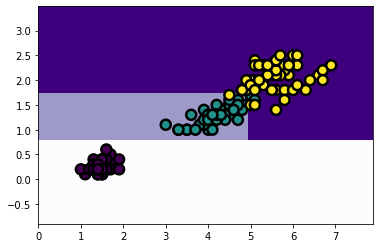

In [110]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
clf.fit(petal_data,Species_data)
xx,yy = getmeshgrid(pt_array)

predicted = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap='Purples')
plt.scatter(pt_array[:,0],pt_array[:,1],c = Species_data,
           s = 100,cmap='viridis',edgecolors='black',linewidths=2.5)

**4.7- Over Fitting for Petal Data**

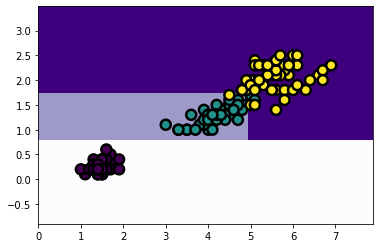

In [111]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
clf.fit(petal_data,Species_data)
xx,yy = getmeshgrid(pt_array)

predicted = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap='Purples')
plt.scatter(pt_array[:,0],pt_array[:,1],c = Species_data,
           s = 100,cmap='viridis',edgecolors='black',linewidths=2.5)


**4.8- Petal Data**

In [112]:
clf = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.025)
clf.fit(sepal_data,Species_data)
x_min,x_max = sp_array[:,0].min()-1,sp_array[:,0].max()+1
y_min,y_max = sp_array[:,1].min()-1,sp_array[:,1].max()+1
xx,yy = np.meshgrid((np.arange(x_min,x_max,0.01)),
                      (np.arange(y_min,y_max,0.01)))
y_  = np.arange(y_min,y_max,0.01)
predicted_class = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
trace1 = go.Heatmap(x=xx[0], y=y_, 
                    z=predicted_class,
                    colorscale='Purples',
                    showscale=True)
trace2 = go.Scatter(x = sp_array[:,0],y = sp_array[:,1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=Species_data, 
                                colorscale='Jet',
                                reversescale = True,
                                line=dict(color='white', width=1.5))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Class 3 Surface Probability',
    hovermode= 'closest',
    showlegend= False)

data = [trace1,trace2]
fig3 = go.Figure(data = data,layout=layout)
py.iplot(fig3)

**5- Applying Final Tree with determined metrics**


In [113]:
params = {
        'criterion':["gini","entropy"],
        'splitter': ["best", "random"],
        'max_depth':[int(x) for x in np.linspace(1,20,5)],
        'min_samples_split':[2,4,6,8],
        'min_samples_leaf':[2,4,6,8],
        'ccp_alpha':[round(x,3) for x in np.linspace(0,0.05,10)]
    }
scores = []
clf = RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=params,cv = 5,n_iter=10,n_jobs=-1,
                        return_train_score=False)
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.006, 0.011, 0.017,
                                                      0.022, 0.028, 0.033,
                                                      0.039, 0.044, 0.05],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15, 20],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'splitter': ['best', 'random']})

In [114]:
clf.best_estimator_


DecisionTreeClassifier(ccp_alpha=0.028, max_depth=10, min_samples_leaf=2,
                       min_samples_split=6)

In [115]:
clf.best_score_


0.925

In [116]:
clf = DecisionTreeClassifier(ccp_alpha=0.028, criterion='entropy', max_depth=5,
                       min_samples_leaf=6)

clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9583333333333334

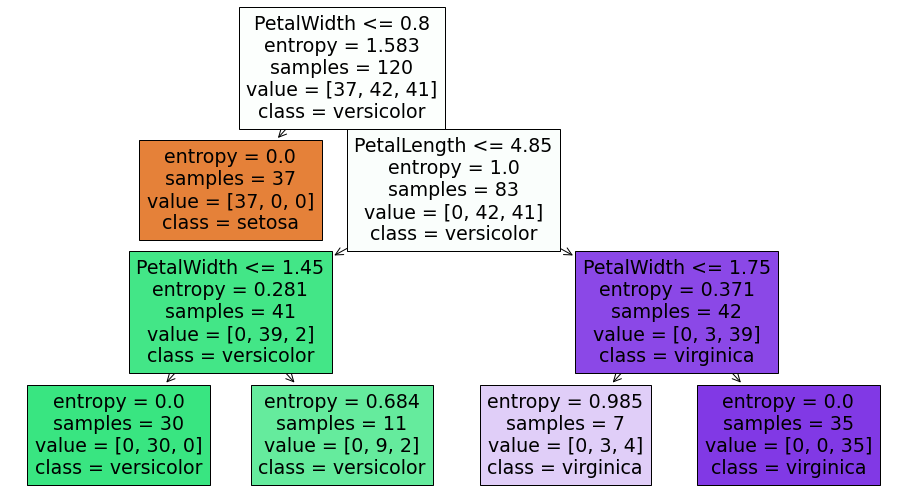

In [117]:
clf = DecisionTreeClassifier(ccp_alpha=0.028, criterion='entropy', max_depth=5,
                       min_samples_leaf=6)
clf.fit(X_train,y_train)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()

In [118]:
clf.score(X_test,y_test)


0.9333333333333333

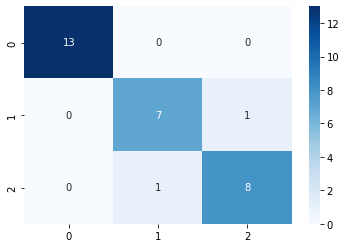

In [119]:
prediction = clf.predict(X_test)
cn = metrics.confusion_matrix(y_test,prediction)
sns.heatmap(cn,annot=True,cmap='Blues')

In [120]:
print(metrics.classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.88      0.88         8
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



**6- Comparing with main Dataset**

In [121]:
prediction = []
train_test = np.array(train)
for i in range(len(train_test)):
    prediction.append(clf.predict([train_test[i]]))

In [122]:
prediction = np.array(prediction)
dataset['Predicted'] = prediction
dataset.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,target,Predicted,Actual_class,Predicted_class
0,5.1,3.5,1.4,0.2,0,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,0,setosa,setosa
2,4.7,3.2,1.3,0.2,0,0,setosa,setosa
3,4.6,3.1,1.5,0.2,0,0,setosa,setosa
4,5.0,3.6,1.4,0.2,0,0,setosa,setosa


In [123]:
mapper = {0:'setosa',1:'versicolor',2:'virginica'}
dataset['Actual_class'] = dataset['target'].map(mapper)
dataset['Predicted_class'] = dataset['Predicted'].map(mapper)
dataset.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,target,Predicted,Actual_class,Predicted_class
0,5.1,3.5,1.4,0.2,0,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,0,setosa,setosa
2,4.7,3.2,1.3,0.2,0,0,setosa,setosa
3,4.6,3.1,1.5,0.2,0,0,setosa,setosa
4,5.0,3.6,1.4,0.2,0,0,setosa,setosa


In [129]:
# dataset.loc[ dataset.target == 2]

In [125]:
dataset['Predicted_class'].value_counts()

virginica     51
setosa        50
versicolor    49
Name: Predicted_class, dtype: int64

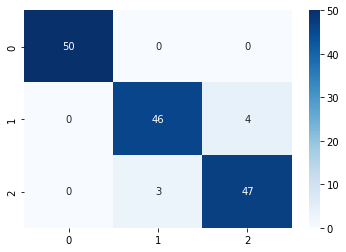

In [126]:
final_prediction = clf.predict(train)
cn = metrics.confusion_matrix(test,final_prediction)
sns.heatmap(cn,annot=True,cmap='Blues')

In [127]:
print(metrics.classification_report(test,final_prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



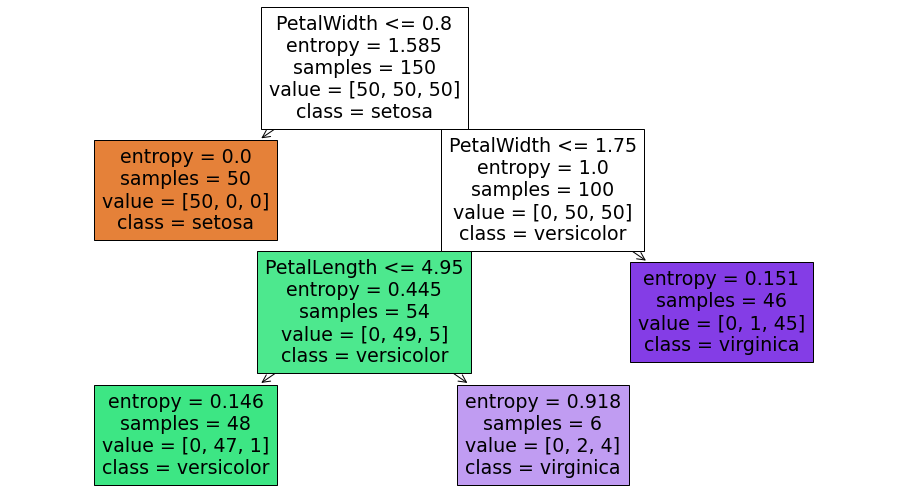

In [128]:
clf = DecisionTreeClassifier(ccp_alpha=0.028, criterion='entropy', max_depth=5,
                       min_samples_leaf=6)
clf.fit(train,test)
classnames=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=classnames)
plt.show()

The End